In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.utils import resample

In [2]:
pd.set_option('display.max_columns', None)

# CARGAS DE TABLAS

In [3]:
tabla1 =  pd.read_csv("C:/Users/Javi/Documents/bootcamp/proyectos/machine_learning/student_data.csv", sep=';')
tabla1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


2 sexo - sexo del alumno (binario: «F» - mujer o «M» - hombre)
3 edad - edad del estudiante (numérico: de 15 a 22 años)
4 address - tipo de domicilio del estudiante (binario: «U» - urbano o «R» - rural)
5 famsize - tamaño de la familia (binario: «LE3» - menor o igual a 3 o «GT3» - mayor de 3)
6 Pstatus - estado de convivencia de los padres (binario: «T» - viven juntos o «A» - separados)
7 Medu - educación de la madre (numérico: 0 - ninguna, 1 - educación primaria (4º grado), 2 - 5º a 9º grado, 3 - educación secundaria o 4 - educación superior)
8 Fedu - educación del padre (numérico: 0 - ninguna, 1 - educación primaria (4º grado), 2 - 5º a 9º grado, 3 - educación secundaria o 4 - educación superior)
9 Mjob - trabajo de la madre (nominal: 'maestra', relacionado con la atención sanitaria, 'servicios' civiles (por ejemplo, administrativo o policía), 'en_casa' u 'otro')
10 Fjob - trabajo del padre (nominal: profesor', 'sanitario', 'servicios' civiles (por ejemplo, administrativo o policía), 'en_casa' u 'otro')
11 razón - razón para elegir este centro (nominal: cerca de «casa», «reputación» del centro, preferencia de «curso» u «otro»)
12 tutor - tutor del alumno (nominal: «madre», «padre» u «otro»)
13 traveltime - tiempo de viaje de casa al colegio (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, o 4 - >1 hora)
14 tiempo de estudio - tiempo de estudio semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)
15 fracasos - número de fracasos en las clases anteriores (numérico: n si 1<=n<3, si no 4)
16 schoolsup - apoyo educativo adicional (binario: sí o no)
17 famsup - apoyo educativo familiar (binario: sí o no)
18 paid - clases pagadas extra dentro de la asignatura del curso (Matemáticas o Portugués) (binario: sí o no)
19 actividades - actividades extraescolares (binario: sí o no)
20 guardería - asistió a la guardería (binario: sí o no)
21 superior - desea cursar estudios superiores (binario: sí o no)
22 internet - acceso a internet en casa (binario: sí o no)
23 romántico - con una relación romántica (binario: sí o no)
24 famrel - calidad de las relaciones familiares (numérico: de 1 - muy malas a 5 - excelentes)
25 freetime - tiempo libre después de la escuela (numérico: de 1 - muy bajo a 5 - muy alto)
26 goout - salir con amigos (numérico: de 1 - muy bajo a 5 - muy alto)
27 Dalc - consumo de alcohol en días laborables (numérico: de 1 - muy bajo a 5 - muy alto)
28 Walc - consumo de alcohol en fin de semana (numérico: de 1 - muy bajo a 5 - muy alto)
29 salud - estado de salud actual (numérico: de 1 - muy malo a 5 - muy bueno)
30 faltas - número de faltas escolares (numérico: de 0 a 93)




In [4]:
tabla2 =  pd.read_csv("C:/Users/Javi/Documents/bootcamp/proyectos/machine_learning/academic_performance_analytics_complete.csv", sep=',')
tabla2

,Timestamp,Student_ID,Age,Gender,Ethnicity,SES,Location,Enrollment_Status,GPA,Attendance_Rate,Study_Hours_per_Week,Extracurricular_Participation,Course_Load,Major_Field_of_Study,Previous_Academic_Performance,Course_Type,Course_Difficulty,Instructor_Rating,Class_Size,Sentiment_Score,Feedback_Length,Access_to_Learning_Materials,Internet_Accessibility,Counseling_Sessions_Attended,Tutoring_Hours,Assignment_Scores,Midterm_Scores,Final_Exam_Scores,Learning_Style_Compatibility,Career_Alignment_Indicator,Library_Usage_Frequency,Study_Group_Participation,Resource_Access_Score,Learning_Material_Satisfaction,Peer_Interaction_Score,Academic_Support_Utilization,Stress_Indicator_Score,Assignment_Completion_Rate,Learning_Satisfaction_Level,Academic_Performance_Category,Sentiment_Classification,Requirement_Fulfillment_Status,Course_Satisfaction_Level,Engagement_Level
0,2018-07-14 06:00:00,1678,25,0,White,Low,"Texas, Dallas",0,2.283531,0.9,17.647264,0,6,Arts,60.237666,Core,Hard,3.776889,30,0.733300,484,0,1,1,0.000000,83.235872,56.684179,74.283938,0,1,3,0,0.696702,1,0.341722,0,0.346726,0.7,Medium,High,Neutral,Partially Met,Neutral,Active
1,2018-09-27 03:00:00,3106,19,1,White,Low,"Texas, Dallas",0,2.787184,0.6,7.304669,0,5,Engineering,71.919002,Core,Hard,3.708644,30,0.179273,450,0,0,0,0.515937,70.477437,63.487994,69.581913,0,1,3,1,0.655516,0,0.665257,0,0.957973,0.8,Medium,Medium,Negative,Partially Met,Neutral,Active
2,2022-04-25 00:00:00,4350,22,1,African American,Low,"Texas, Dallas",0,2.689566,0.8,12.816062,1,5,Engineering,79.622769,Elective,Easy,4.453540,30,0.357695,496,0,0,0,5.293700,78.254544,81.371728,71.698227,0,0,1,0,0.666346,1,0.501590,0,0.431574,0.7,Low,Medium,Neutral,Fully Met,Satisfied,Moderate
3,2024-02-24 10:00:00,2890,20,0,White,Medium,"Texas, Dallas",0,2.486635,0.6,19.797873,1,4,Arts,82.419630,Elective,Moderate,3.558563,30,0.532631,162,0,0,0,0.000000,90.783972,66.462219,70.034328,1,0,0,0,0.646857,0,0.665658,0,0.633358,0.8,High,High,Neutral,Partially Met,Unsatisfied,Active
4,2020-10-09 23:00:00,4019,25,1,White,Medium,"Texas, Dallas",0,3.258069,1.0,14.457067,0,5,Engineering,69.389492,Advanced,Easy,2.715564,30,0.714675,234,1,1,0,0.830865,65.559076,92.394189,55.446190,0,1,0,0,0.546623,0,0.555273,0,0.581689,0.8,Medium,Medium,Positive,Partially Met,Neutral,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,2019-10-29 18:00:00,3885,26,1,White,Low,"Texas, Dallas",0,2.149150,0.7,24.606399,0,4,Arts,78.469013,Elective,Moderate,3.320002,10,0.571314,210,0,0,0,0.000000,79.638439,48.430788,80.654766,0,1,0,1,0.678753,1,0.481441,0,0.627292,0.9,High,Low,Positive,Fully Met,Satisfied,Moderate
61341,2020-09-11 18:00:00,2972,29,1,White,High,"Texas, Dallas",1,2.452148,0.9,13.969722,0,5,Arts,75.114187,Elective,Moderate,4.084590,10,0.491516,101,0,0,0,2.968496,71.845174,70.337474,84.596145,0,1,3,0,0.553857,1,0.621769,0,0.990375,0.8,Medium,High,Neutral,Partially Met,Neutral,Active
61342,2018-11-14 12:00:00,3397,19,1,White,Low,"Texas, Dallas",1,2.372740,0.9,19.750728,0,4,Science,67.443383,Elective,Hard,3.832986,30,0.454625,158,0,0,0,0.000000,69.577117,69.073187,59.010887,0,0,3,0,0.632214,0,0.498190,0,0.469423,0.8,High,Medium,Positive,Partially Met,Satisfied,Active
61343,2023-03-15 22:00:00,4617,25,0,White,High,"Texas, Dallas",0,2.654484,0.8,15.507835,0,4,Law,67.280996,Core,Hard,3.144849,20,0.650554,495,0,0,2,0.872598,65.974002,57.328627,72.791444,1,0,5,1,0.824990,0,0.420456,1,0.633345,0.9,High,Medium,Neutral,Partially Met,Satisfied,Inactive


3 Edad Edad del alumno en el momento de la recogida de datos.
4 Sexo El sexo del alumno (codificado como valores binarios o categóricos).
5 Origen étnico Origen étnico del alumno, basado en los datos demográficos disponibles.
6 SES Indicador del estatus socioeconómico que refleja la procedencia del alumno.
7 Ubicación Ubicación geográfica donde se recogieron los datos, concretamente en el área de Dallas-Fort Worth.
9 GPA Promedio de calificaciones, que representa el rendimiento académico del estudiante.
10 Attendance_Rate Tasa de asistencia a clase, expresada en porcentaje.
11 Study_Hours_per_Week Número de horas que el alumno dedica a estudiar cada semana.
12 Extracurricular_Participation Puntuación que indica el nivel de participación en actividades extracurriculares.
14 Previous_Academic_Performance Indicador histórico del rendimiento académico del alumno.
16 Calificación_del_instructor Calificación que refleja la satisfacción del alumno con la enseñanza del instructor.
17 Compatibilidad_Estilo_de_Aprendizaje Puntuación que indica en qué medida el estilo de aprendizaje preferido del alumno se ajusta al formato del curso.
18 Indicador de alineación profesional Mide la alineación entre el contenido del curso y los objetivos profesionales del estudiante.
19 Frecuencia de uso de la biblioteca Frecuencia con la que el estudiante accede a la biblioteca o a los recursos de aprendizaje en línea.
20 Study_Group_Participation Participación en grupos de estudio o actividades de aprendizaje colaborativo.
21 Resource_Access_Score Indicador del acceso del alumno a los recursos académicos.
22 Peer_Interaction_Score Medida de la interacción del alumno con sus compañeros.
23 Puntuación del indicador de estrés Puntuación que refleja el nivel de estrés declarado por el alumno.
... ... ...
43 Learning_Satisfaction_Level Indicador de la satisfacción del estudiante con su experiencia de aprendizaje.

# TIPOS DE DATOS

In [5]:
# Tipos de datos de las columnas de tabla1
print("Tipos de datos de tabla1:")
print(tabla1.dtypes)

# Tipos de datos de las columnas de tabla2
print("\nTipos de datos de tabla2:")
print(tabla2.dtypes)



Tipos de datos de tabla1:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Tipos de datos de tabla2:
Timestamp                          object
Student_ID                          int64
Age                                 int64
Gender                              int64
Ethnicity                          object
SES                           

# TABLA 1 - NUMERICA

In [6]:
tabla2.head(1)


,Timestamp,Student_ID,Age,Gender,Ethnicity,SES,Location,Enrollment_Status,GPA,Attendance_Rate,Study_Hours_per_Week,Extracurricular_Participation,Course_Load,Major_Field_of_Study,Previous_Academic_Performance,Course_Type,Course_Difficulty,Instructor_Rating,Class_Size,Sentiment_Score,Feedback_Length,Access_to_Learning_Materials,Internet_Accessibility,Counseling_Sessions_Attended,Tutoring_Hours,Assignment_Scores,Midterm_Scores,Final_Exam_Scores,Learning_Style_Compatibility,Career_Alignment_Indicator,Library_Usage_Frequency,Study_Group_Participation,Resource_Access_Score,Learning_Material_Satisfaction,Peer_Interaction_Score,Academic_Support_Utilization,Stress_Indicator_Score,Assignment_Completion_Rate,Learning_Satisfaction_Level,Academic_Performance_Category,Sentiment_Classification,Requirement_Fulfillment_Status,Course_Satisfaction_Level,Engagement_Level
0,2018-07-14 06:00:00,1678,25,0,White,Low,"Texas, Dallas",0,2.283531,0.9,17.647264,0,6,Arts,60.237666,Core,Hard,3.776889,30,0.7333,484,0,1,1,0.0,83.235872,56.684179,74.283938,0,1,3,0,0.696702,1,0.341722,0,0.346726,0.7,Medium,High,Neutral,Partially Met,Neutral,Active


In [7]:
tabla_def = tabla2[["Age", "Gender", "Ethnicity", "SES", "Internet_Accessibility", "Attendance_Rate", "Study_Hours_per_Week", "Extracurricular_Participation", "Study_Group_Participation", "Access_to_Learning_Materials", "Academic_Support_Utilization", "Course_Difficulty", "Assignment_Scores", "Midterm_Scores", "Final_Exam_Scores", "GPA"]]
tabla_def

,Age,Gender,Ethnicity,SES,Internet_Accessibility,Attendance_Rate,Study_Hours_per_Week,Extracurricular_Participation,Study_Group_Participation,Access_to_Learning_Materials,Academic_Support_Utilization,Course_Difficulty,Assignment_Scores,Midterm_Scores,Final_Exam_Scores,GPA
0,25,0,White,Low,1,0.9,17.647264,0,0,0,0,Hard,83.235872,56.684179,74.283938,2.283531
1,19,1,White,Low,0,0.6,7.304669,0,1,0,0,Hard,70.477437,63.487994,69.581913,2.787184
2,22,1,African American,Low,0,0.8,12.816062,1,0,0,0,Easy,78.254544,81.371728,71.698227,2.689566
3,20,0,White,Medium,0,0.6,19.797873,1,0,0,0,Moderate,90.783972,66.462219,70.034328,2.486635
4,25,1,White,Medium,1,1.0,14.457067,0,0,1,0,Easy,65.559076,92.394189,55.446190,3.258069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,26,1,White,Low,0,0.7,24.606399,0,1,0,0,Moderate,79.638439,48.430788,80.654766,2.149150
61341,29,1,White,High,0,0.9,13.969722,0,0,0,0,Moderate,71.845174,70.337474,84.596145,2.452148
61342,19,1,White,Low,0,0.9,19.750728,0,0,0,0,Hard,69.577117,69.073187,59.010887,2.372740
61343,25,0,White,High,0,0.8,15.507835,0,1,0,1,Hard,65.974002,57.328627,72.791444,2.654484


In [8]:
tabla_def.columns = tabla_def.columns.str.lower()


In [9]:
# Crear la nueva columna 'extracurricular_participation'
tabla_def['extracurricular_participation'] = ((tabla_def['extracurricular_participation'] == 1) | 
                                              (tabla_def['study_group_participation'] == 1) | 
                                              (tabla_def['access_to_learning_materials'] == 1)).astype(int)

# Eliminar las columnas originales
tabla_def.drop(columns=['study_group_participation', 'access_to_learning_materials'], inplace=True)

# Reordenar las columnas para colocar 'extracurricular_participation' en la séptima posición
cols = tabla_def.columns.tolist()
cols.insert(6, cols.pop(cols.index('extracurricular_participation')))
tabla_def = tabla_def[cols]

# Mostrar el resultado
tabla_def.head()

C:\Users\Javi\AppData\Local\Temp\ipykernel_5752\1865724906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_def['extracurricular_participation'] = ((tabla_def['extracurricular_participation'] == 1) |
C:\Users\Javi\AppData\Local\Temp\ipykernel_5752\1865724906.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_def.drop(columns=['study_group_participation', 'access_to_learning_materials'], inplace=True)


,age,gender,ethnicity,ses,internet_accessibility,attendance_rate,extracurricular_participation,study_hours_per_week,academic_support_utilization,course_difficulty,assignment_scores,midterm_scores,final_exam_scores,gpa
0,25,0,White,Low,1,0.9,0,17.647264,0,Hard,83.235872,56.684179,74.283938,2.283531
1,19,1,White,Low,0,0.6,1,7.304669,0,Hard,70.477437,63.487994,69.581913,2.787184
2,22,1,African American,Low,0,0.8,1,12.816062,0,Easy,78.254544,81.371728,71.698227,2.689566
3,20,0,White,Medium,0,0.6,1,19.797873,0,Moderate,90.783972,66.462219,70.034328,2.486635
4,25,1,White,Medium,1,1.0,1,14.457067,0,Easy,65.559076,92.394189,55.446190,3.258069


In [10]:
# Crear un diccionario de mapeo para la columna 'ses'
ses_mapping = {'High': 1, 'Medium': 2, 'Low': 3}

# Aplicar el mapeo a la columna 'ses'
tabla_def['ses'] = tabla_def['ses'].map(ses_mapping)

# Verificar los cambios
tabla_def[['ses']].head()

,ses
0,3
1,3
2,3
3,2
4,2


In [11]:
# Generar one hot encoding para la columna 'ethnicity'
tabla_def = pd.get_dummies(tabla_def, columns=['ethnicity'], prefix='ethnicity')

# Mostrar el resultado
tabla_def.head()

,age,gender,ses,internet_accessibility,attendance_rate,extracurricular_participation,study_hours_per_week,academic_support_utilization,course_difficulty,assignment_scores,midterm_scores,final_exam_scores,gpa,ethnicity_African American,ethnicity_Asian,ethnicity_Hispanic,ethnicity_Other,ethnicity_White
0,25,0,3,1,0.9,0,17.647264,0,Hard,83.235872,56.684179,74.283938,2.283531,False,False,False,False,True
1,19,1,3,0,0.6,1,7.304669,0,Hard,70.477437,63.487994,69.581913,2.787184,False,False,False,False,True
2,22,1,3,0,0.8,1,12.816062,0,Easy,78.254544,81.371728,71.698227,2.689566,True,False,False,False,False
3,20,0,2,0,0.6,1,19.797873,0,Moderate,90.783972,66.462219,70.034328,2.486635,False,False,False,False,True
4,25,1,2,1,1.0,1,14.457067,0,Easy,65.559076,92.394189,55.446190,3.258069,False,False,False,False,True


In [12]:
tabla_def.head(1)


,age,gender,ses,internet_accessibility,attendance_rate,extracurricular_participation,study_hours_per_week,academic_support_utilization,course_difficulty,assignment_scores,midterm_scores,final_exam_scores,gpa,ethnicity_African American,ethnicity_Asian,ethnicity_Hispanic,ethnicity_Other,ethnicity_White
0,25,0,3,1,0.9,0,17.647264,0,Hard,83.235872,56.684179,74.283938,2.283531,False,False,False,False,True


In [13]:
# Sustituir los valores True por 1 y False por 0 en las últimas 5 columnas
tabla_def[['ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White']] = tabla_def[['ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White']].astype(int)

# Mostrar el resultado
tabla_def.head()

,age,gender,ses,internet_accessibility,attendance_rate,extracurricular_participation,study_hours_per_week,academic_support_utilization,course_difficulty,assignment_scores,midterm_scores,final_exam_scores,gpa,ethnicity_African American,ethnicity_Asian,ethnicity_Hispanic,ethnicity_Other,ethnicity_White
0,25,0,3,1,0.9,0,17.647264,0,Hard,83.235872,56.684179,74.283938,2.283531,0,0,0,0,1
1,19,1,3,0,0.6,1,7.304669,0,Hard,70.477437,63.487994,69.581913,2.787184,0,0,0,0,1
2,22,1,3,0,0.8,1,12.816062,0,Easy,78.254544,81.371728,71.698227,2.689566,1,0,0,0,0
3,20,0,2,0,0.6,1,19.797873,0,Moderate,90.783972,66.462219,70.034328,2.486635,0,0,0,0,1
4,25,1,2,1,1.0,1,14.457067,0,Easy,65.559076,92.394189,55.446190,3.258069,0,0,0,0,1


In [14]:
# Reordenar las columnas
cols = [col for col in tabla_def.columns if col not in ['assignment_scores', 'midterm_scores', 'final_exam_scores', 'gpa']]
cols += ['assignment_scores', 'midterm_scores', 'final_exam_scores', 'gpa']
tabla_def = tabla_def[cols]

# Mostrar el resultado
tabla_def.head()

,age,gender,ses,internet_accessibility,attendance_rate,extracurricular_participation,study_hours_per_week,academic_support_utilization,course_difficulty,ethnicity_African American,ethnicity_Asian,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,assignment_scores,midterm_scores,final_exam_scores,gpa
0,25,0,3,1,0.9,0,17.647264,0,Hard,0,0,0,0,1,83.235872,56.684179,74.283938,2.283531
1,19,1,3,0,0.6,1,7.304669,0,Hard,0,0,0,0,1,70.477437,63.487994,69.581913,2.787184
2,22,1,3,0,0.8,1,12.816062,0,Easy,1,0,0,0,0,78.254544,81.371728,71.698227,2.689566
3,20,0,2,0,0.6,1,19.797873,0,Moderate,0,0,0,0,1,90.783972,66.462219,70.034328,2.486635
4,25,1,2,1,1.0,1,14.457067,0,Easy,0,0,0,0,1,65.559076,92.394189,55.446190,3.258069


# TABLA 2 - CATEGORICA

In [15]:
tabla_def2 = tabla2[["Age", "Gender", "Ethnicity", "SES", "Internet_Accessibility", "Attendance_Rate", "Study_Hours_per_Week", "Extracurricular_Participation", "Study_Group_Participation", "Access_to_Learning_Materials", "Academic_Support_Utilization", "Course_Difficulty", "Assignment_Scores", "Midterm_Scores", "Final_Exam_Scores", "GPA"]]
tabla_def2

,Age,Gender,Ethnicity,SES,Internet_Accessibility,Attendance_Rate,Study_Hours_per_Week,Extracurricular_Participation,Study_Group_Participation,Access_to_Learning_Materials,Academic_Support_Utilization,Course_Difficulty,Assignment_Scores,Midterm_Scores,Final_Exam_Scores,GPA
0,25,0,White,Low,1,0.9,17.647264,0,0,0,0,Hard,83.235872,56.684179,74.283938,2.283531
1,19,1,White,Low,0,0.6,7.304669,0,1,0,0,Hard,70.477437,63.487994,69.581913,2.787184
2,22,1,African American,Low,0,0.8,12.816062,1,0,0,0,Easy,78.254544,81.371728,71.698227,2.689566
3,20,0,White,Medium,0,0.6,19.797873,1,0,0,0,Moderate,90.783972,66.462219,70.034328,2.486635
4,25,1,White,Medium,1,1.0,14.457067,0,0,1,0,Easy,65.559076,92.394189,55.446190,3.258069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,26,1,White,Low,0,0.7,24.606399,0,1,0,0,Moderate,79.638439,48.430788,80.654766,2.149150
61341,29,1,White,High,0,0.9,13.969722,0,0,0,0,Moderate,71.845174,70.337474,84.596145,2.452148
61342,19,1,White,Low,0,0.9,19.750728,0,0,0,0,Hard,69.577117,69.073187,59.010887,2.372740
61343,25,0,White,High,0,0.8,15.507835,0,1,0,1,Hard,65.974002,57.328627,72.791444,2.654484


In [16]:
tabla_def2.columns = tabla_def2.columns.str.lower()


In [17]:
# Crear la nueva columna 'extracurricular_participation'
tabla_def2['extracurricular_participation'] = ((tabla_def2['extracurricular_participation'] == 1) | 
                                              (tabla_def2['study_group_participation'] == 1) | 
                                              (tabla_def2['access_to_learning_materials'] == 1)).astype(int)

# Eliminar las columnas originales
tabla_def2.drop(columns=['study_group_participation', 'access_to_learning_materials'], inplace=True)

# Reordenar las columnas para colocar 'extracurricular_participation' en la séptima posición
cols = tabla_def2.columns.tolist()
cols.insert(6, cols.pop(cols.index('extracurricular_participation')))
tabla_def2 = tabla_def2[cols]

# Mostrar el resultado
tabla_def2.head()

C:\Users\Javi\AppData\Local\Temp\ipykernel_5752\4286572193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_def2['extracurricular_participation'] = ((tabla_def2['extracurricular_participation'] == 1) |
C:\Users\Javi\AppData\Local\Temp\ipykernel_5752\4286572193.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_def2.drop(columns=['study_group_participation', 'access_to_learning_materials'], inplace=True)


,age,gender,ethnicity,ses,internet_accessibility,attendance_rate,extracurricular_participation,study_hours_per_week,academic_support_utilization,course_difficulty,assignment_scores,midterm_scores,final_exam_scores,gpa
0,25,0,White,Low,1,0.9,0,17.647264,0,Hard,83.235872,56.684179,74.283938,2.283531
1,19,1,White,Low,0,0.6,1,7.304669,0,Hard,70.477437,63.487994,69.581913,2.787184
2,22,1,African American,Low,0,0.8,1,12.816062,0,Easy,78.254544,81.371728,71.698227,2.689566
3,20,0,White,Medium,0,0.6,1,19.797873,0,Moderate,90.783972,66.462219,70.034328,2.486635
4,25,1,White,Medium,1,1.0,1,14.457067,0,Easy,65.559076,92.394189,55.446190,3.258069


In [18]:
# Cambiar los valores de la columna 'course_difficulty'
difficulty_mapping = {'Hard': 1, 'Moderate': 2, 'Easy': 3}
tabla_def['course_difficulty'] = tabla_def['course_difficulty'].map(difficulty_mapping)
tabla_def2['course_difficulty'] = tabla_def2['course_difficulty'].map(difficulty_mapping)

# Verificar los cambios
print(tabla_def[['course_difficulty']].head())
print(tabla_def2[['course_difficulty']].head())

   course_difficulty
0                  1
1                  1
2                  3
3                  2
4                  3
   course_difficulty
0                  1
1                  1
2                  3
3                  2
4                  3


In [19]:
# Generar one hot encoding para la columna 'ethnicity'
tabla_def2 = pd.get_dummies(tabla_def2, columns=['ethnicity'], prefix='ethnicity')

# Mostrar el resultado
tabla_def2.head()

,age,gender,ses,internet_accessibility,attendance_rate,extracurricular_participation,study_hours_per_week,academic_support_utilization,course_difficulty,assignment_scores,midterm_scores,final_exam_scores,gpa,ethnicity_African American,ethnicity_Asian,ethnicity_Hispanic,ethnicity_Other,ethnicity_White
0,25,0,Low,1,0.9,0,17.647264,0,1,83.235872,56.684179,74.283938,2.283531,False,False,False,False,True
1,19,1,Low,0,0.6,1,7.304669,0,1,70.477437,63.487994,69.581913,2.787184,False,False,False,False,True
2,22,1,Low,0,0.8,1,12.816062,0,3,78.254544,81.371728,71.698227,2.689566,True,False,False,False,False
3,20,0,Medium,0,0.6,1,19.797873,0,2,90.783972,66.462219,70.034328,2.486635,False,False,False,False,True
4,25,1,Medium,1,1.0,1,14.457067,0,3,65.559076,92.394189,55.446190,3.258069,False,False,False,False,True


In [20]:
# Crear un diccionario de mapeo para la columna 'ses'
ses_mapping = {'High': 1, 'Medium': 2, 'Low': 3}

# Aplicar el mapeo a la columna 'ses'
tabla_def2['ses'] = tabla_def2['ses'].map(ses_mapping)

# Verificar los cambios
tabla_def2[['ses']].head()

,ses
0,3
1,3
2,3
3,2
4,2


In [21]:
tabla_def2.head(1)


,age,gender,ses,internet_accessibility,attendance_rate,extracurricular_participation,study_hours_per_week,academic_support_utilization,course_difficulty,assignment_scores,midterm_scores,final_exam_scores,gpa,ethnicity_African American,ethnicity_Asian,ethnicity_Hispanic,ethnicity_Other,ethnicity_White
0,25,0,3,1,0.9,0,17.647264,0,1,83.235872,56.684179,74.283938,2.283531,False,False,False,False,True


In [ ]:
# Sustituir los valores True por 1 y False por 0 en las últimas 5 columnas
tabla_def2[['ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White']] = tabla_def2[['ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White']].astype(int)

# Mostrar el resultado
tabla_def2.head()

In [22]:
# Sustituir los valores True por 1 y False por 0 en las últimas 5 columnas
tabla_def2[['ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White']] = tabla_def2[['ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White']].astype(int)

# Mostrar el resultado
tabla_def2.head()

,age,gender,ses,internet_accessibility,attendance_rate,extracurricular_participation,study_hours_per_week,academic_support_utilization,course_difficulty,assignment_scores,midterm_scores,final_exam_scores,gpa,ethnicity_African American,ethnicity_Asian,ethnicity_Hispanic,ethnicity_Other,ethnicity_White
0,25,0,3,1,0.9,0,17.647264,0,1,83.235872,56.684179,74.283938,2.283531,0,0,0,0,1
1,19,1,3,0,0.6,1,7.304669,0,1,70.477437,63.487994,69.581913,2.787184,0,0,0,0,1
2,22,1,3,0,0.8,1,12.816062,0,3,78.254544,81.371728,71.698227,2.689566,1,0,0,0,0
3,20,0,2,0,0.6,1,19.797873,0,2,90.783972,66.462219,70.034328,2.486635,0,0,0,0,1
4,25,1,2,1,1.0,1,14.457067,0,3,65.559076,92.394189,55.446190,3.258069,0,0,0,0,1


In [23]:
# Reordenar las columnas
cols = [col for col in tabla_def2.columns if col not in ['assignment_scores', 'midterm_scores', 'final_exam_scores', 'gpa']]
cols += ['assignment_scores', 'midterm_scores', 'final_exam_scores', 'gpa']
tabla_def2 = tabla_def2[cols]

# Mostrar el resultado
tabla_def2.head()

,age,gender,ses,internet_accessibility,attendance_rate,extracurricular_participation,study_hours_per_week,academic_support_utilization,course_difficulty,ethnicity_African American,ethnicity_Asian,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,assignment_scores,midterm_scores,final_exam_scores,gpa
0,25,0,3,1,0.9,0,17.647264,0,1,0,0,0,0,1,83.235872,56.684179,74.283938,2.283531
1,19,1,3,0,0.6,1,7.304669,0,1,0,0,0,0,1,70.477437,63.487994,69.581913,2.787184
2,22,1,3,0,0.8,1,12.816062,0,3,1,0,0,0,0,78.254544,81.371728,71.698227,2.689566
3,20,0,2,0,0.6,1,19.797873,0,2,0,0,0,0,1,90.783972,66.462219,70.034328,2.486635
4,25,1,2,1,1.0,1,14.457067,0,3,0,0,0,0,1,65.559076,92.394189,55.446190,3.258069


# GRAFICAS DE PREVISUALIZACION

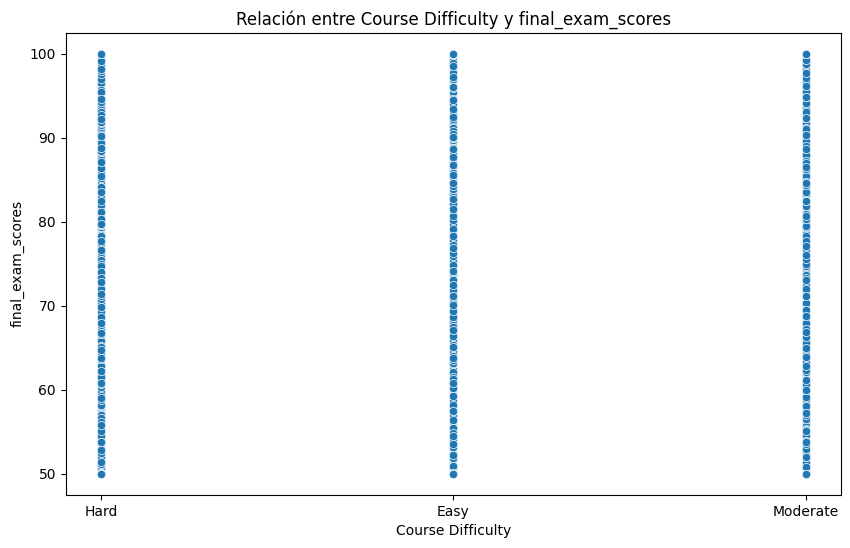

In [27]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tabla2, x='Course_Difficulty', y='Final_Exam_Scores')
plt.title('Relación entre Course Difficulty y final_exam_scores')
plt.xlabel('Course Difficulty')
plt.ylabel('final_exam_scores')
plt.show()


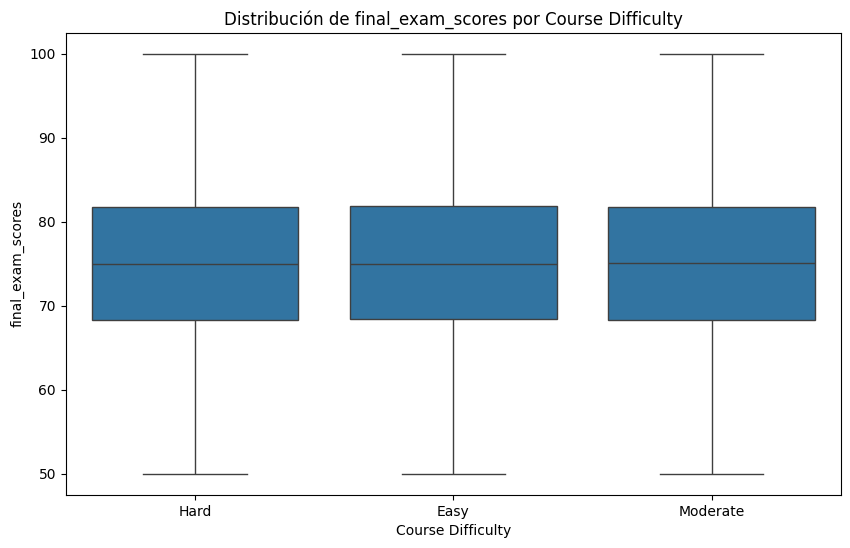

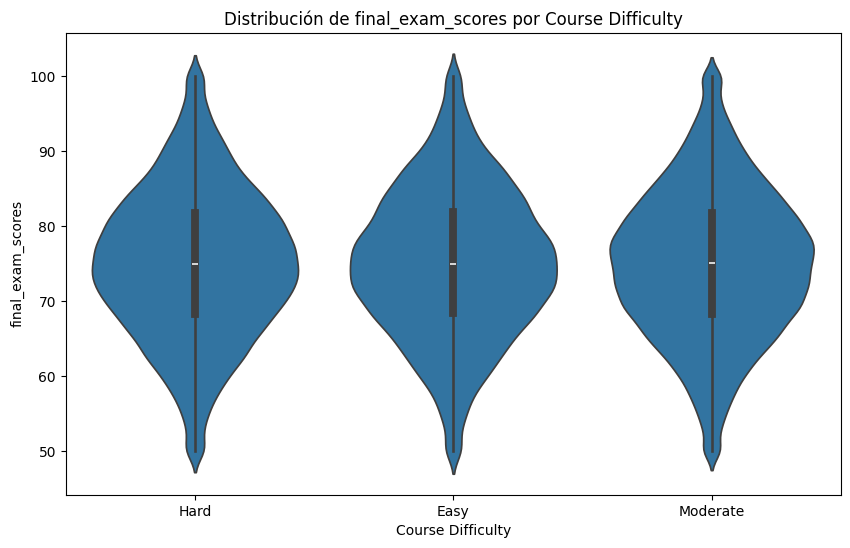

C:\Users\Javi\AppData\Local\Temp\ipykernel_5752\4188077984.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tabla2, x='Course_Difficulty', y='Final_Exam_Scores', ci=None)


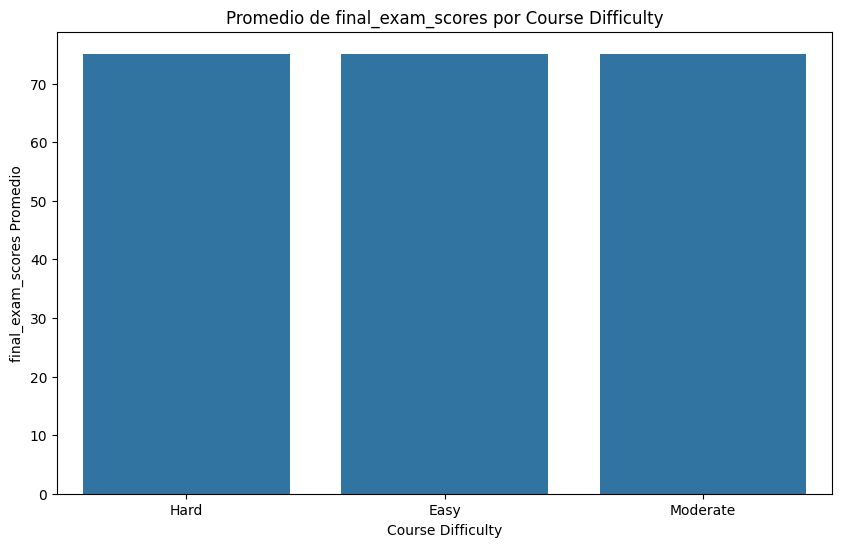

In [29]:


# Gráfico de caja (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=tabla2, x='Course_Difficulty', y='Final_Exam_Scores')
plt.title('Distribución de final_exam_scores por Course Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('final_exam_scores')
plt.show()

# Gráfico de violín (violin plot)
plt.figure(figsize=(10, 6))
sns.violinplot(data=tabla2, x='Course_Difficulty', y='Final_Exam_Scores')
plt.title('Distribución de final_exam_scores por Course Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('final_exam_scores')
plt.show()

# Gráfico de barras (bar plot)
plt.figure(figsize=(10, 6))
sns.barplot(data=tabla2, x='Course_Difficulty', y='Final_Exam_Scores', ci=None)
plt.title('Promedio de final_exam_scores por Course Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('final_exam_scores Promedio')
plt.show()